In [3]:
import glob, math
from netCDF4 import Dataset
from PIL import Image
import numpy.ma as ma
import numpy as np

In [110]:
f = Dataset("../data/raw/2017/2017-08-05.nc")

In [111]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: SCUD: Surface CUrrents from Diagnostic model
    File_type: gridded lat/lon
    CreatedBy: IPRC/SOEST U. of Hawaii
    CreatedOn: 2018-06-06 16:48:05 HST
    Version: v 1.0
    dimensions(sizes): longitude(1440), latitude(720), time(1)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float32 time(time), float32 u(time,latitude,longitude), float32 v(time,latitude,longitude)
    groups: 

In [113]:
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = f.variables["u"][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
len(u['values'])

1036800

In [75]:
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v['values'] = f.variables["v"][0].flatten()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()

In [73]:
ma.is_masked(u["values"][580000])

False

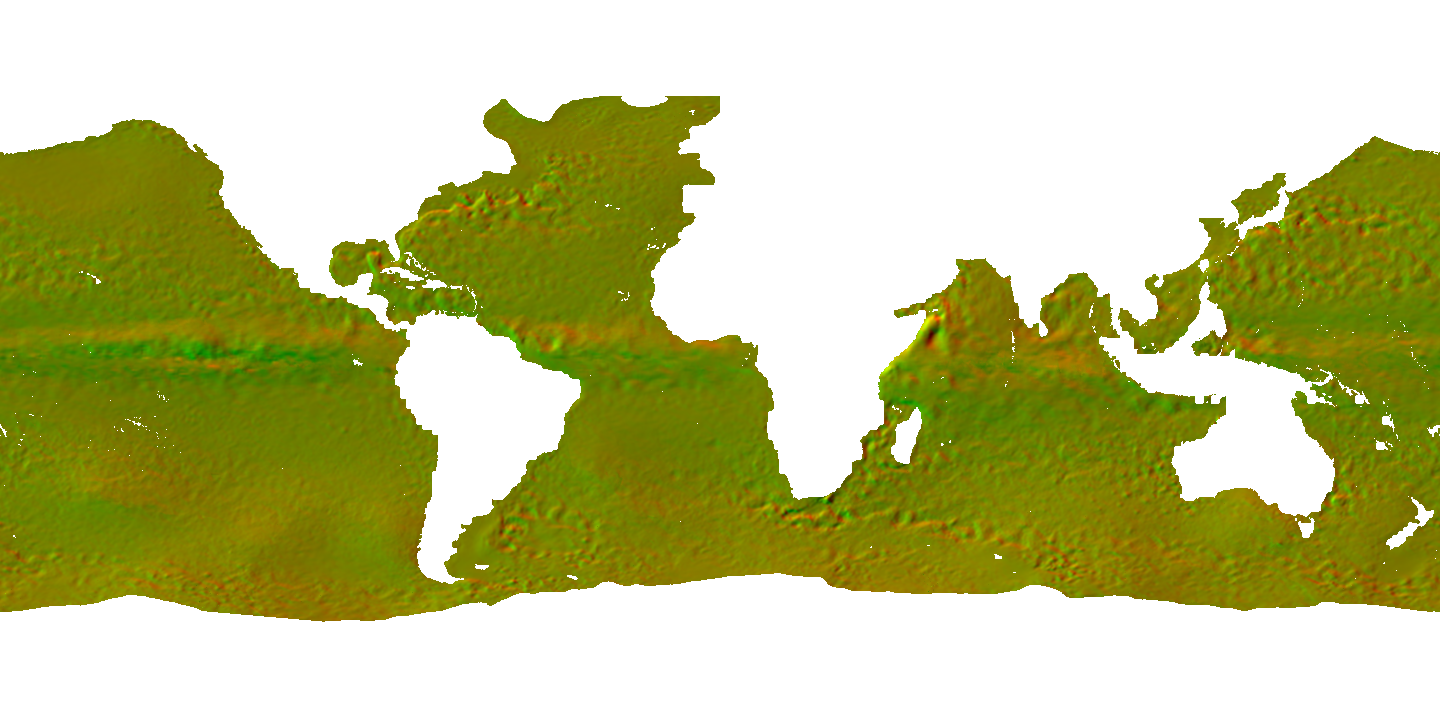

In [76]:
height = 720
width = 1440
img = Image.new('RGBA', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
        
        
img.save("test.png")
Image.open("test.png")

In [78]:
f = Dataset("../data/raw/oscar_vel9401.nc")
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    VARIABLE: Ocean Surface Currents
    DATATYPE: 1/72 YEAR Interval
    DATASUBTYPE: unfiltered
    GEORANGE: 20 to 420 -80 to 80
    PERIOD: Jul.02,2018
    YEAR: 2018
    DESCRIPTION: OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE: 17:20 07-Aug-2018
    VERSION: 2009.0
    SOURCE: Gary Lagerloef, ESR (lager@esr.org) and Kathleen Dohan, ESR (kdohan@esr.org)
    CONTACT: Kathleen Dohan (kdohan@esr.org)
    COMPANY: Earth & Space Research, Seattle, WA
    REFERENCE: Bonjean F. and G.S.E. Lagerloef, 2002 ,"Diagnostic model and analysis of the surface currents in the tropical Pacific ocean", J. Phys. Oceanogr., 32, 2,938-2,954
    NOTE1: Maximum Mask velocity is the geostrophic component at all points + any concurrent Ekman and buoyancy components
    NOTE2: Longitude extends from 20 E to 420 E to avoid a break in major ocean basins. Data repeats in overlap region.
    dimensions(s

In [86]:
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = f.variables["u"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()

v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v['values'] = f.variables["v"][0][0].flatten()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


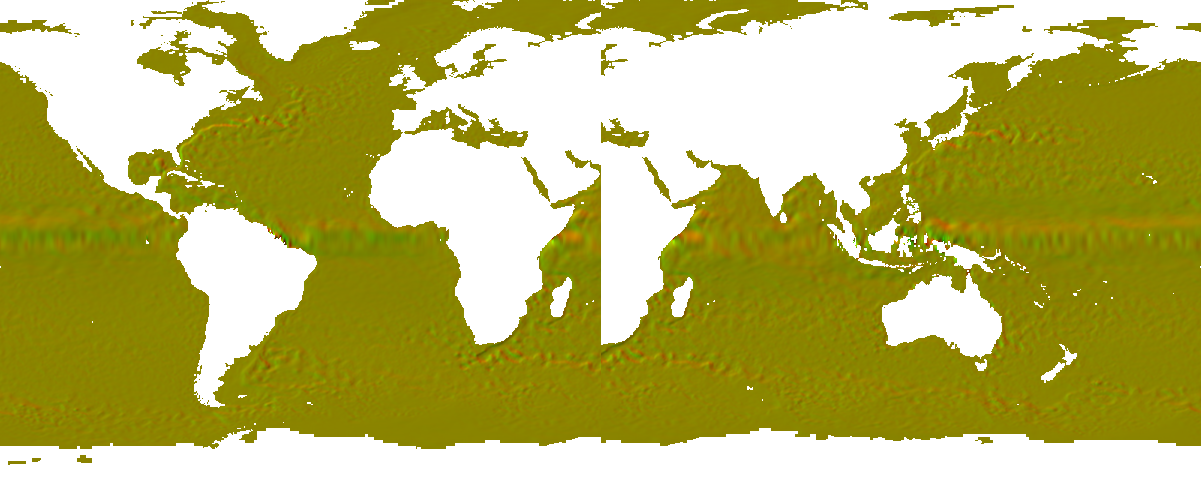

In [91]:
height = 481
width = 1201
img = Image.new('RGBA', (width,height))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255
        data[x,y] = (int(r),int(g),int(b), int(a)) 
        
        
img.save("oscar.png")
Image.open("oscar.png")

In [67]:
v

{'maximum': 1.8099827,
 'minimum': -1.7363408,
 'values': masked_array(data = [-- -- -- ..., -- -- --],
              mask = [ True  True  True ...,  True  True  True],
        fill_value = -9999.0)}

In [94]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
y = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
(x+y)/2

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [95]:
f = Dataset("../data/raw/2017/2017-08-05.nc")
g = Dataset("../data/raw/2017/2017-08-06.nc")

In [98]:
u['values'] = f.variables["u"][0].flatten() + g.variables["u"][0].flatten()
u['values'] /= 2.0
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()


In [99]:
v['values'] = f.variables["v"][0].flatten() + g.variables["v"][0].flatten()
v['values'] /= 2.0
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()


In [100]:
height = 720
width = 1440
img = Image.new('RGBA', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
        
        
img.save("avg-test.png")
Image.open("avg-test.png")

IOError: [Errno 2] No such file or directory: 'avg-test.png'

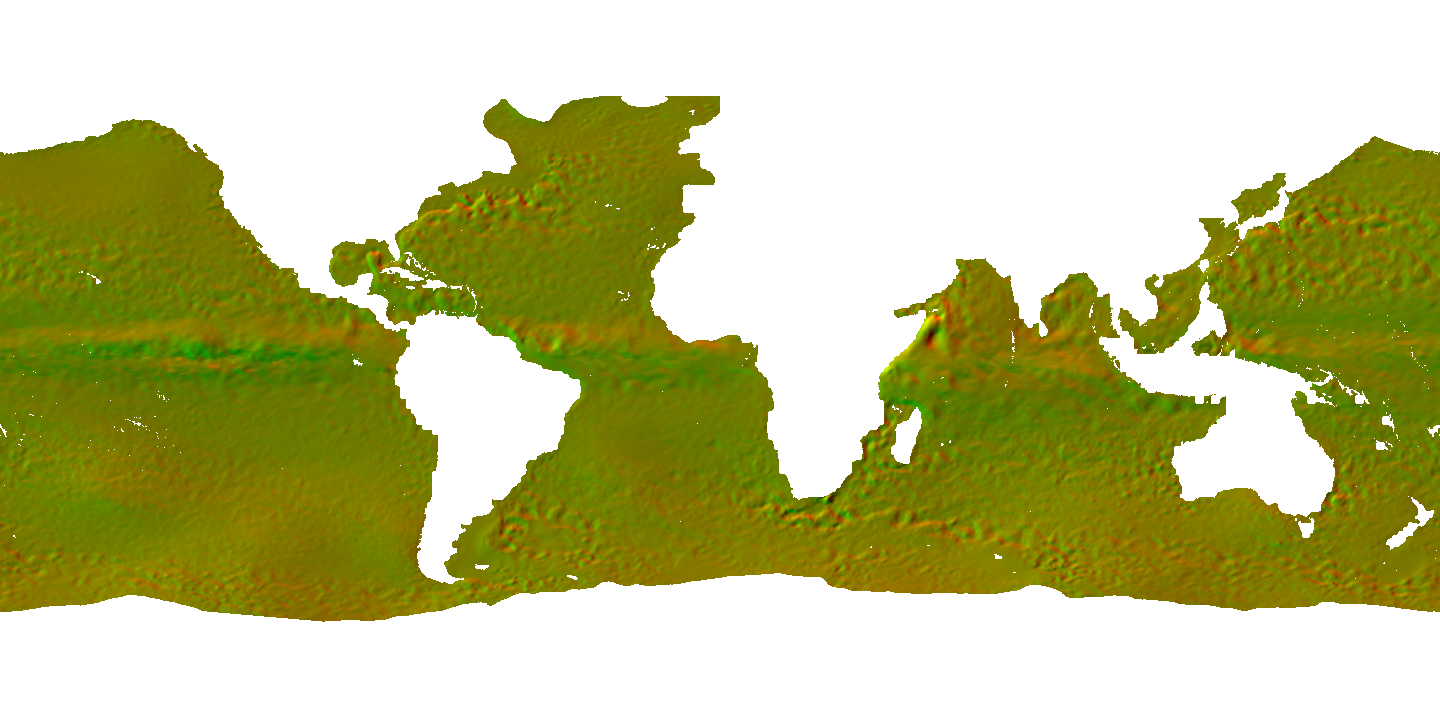

In [101]:
Image.open("avd-test.png")

In [116]:
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
august = glob.glob("../data/raw/2017/2017*.nc")
for day in august:
    f = Dataset(day)
    if len(u['values']) == 0:
        u['values'] = f.variables["u"][0].flatten()
        v['values'] = f.variables["v"][0].flatten()
    else:
        u['values'] += f.variables["u"][0].flatten()
        v['values'] += f.variables["v"][0].flatten()
u['values'] /= 2.0
v['values'] /= 2.0
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()

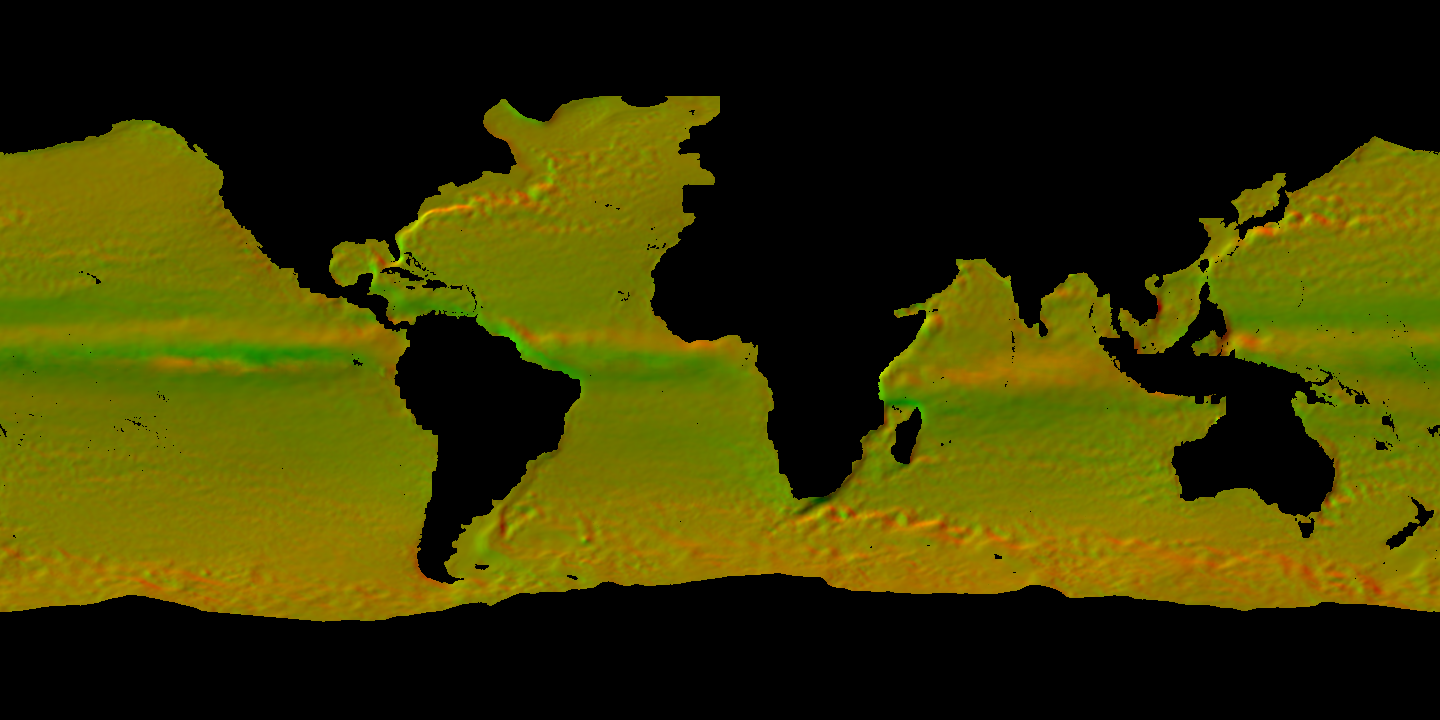

In [118]:
height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
        
        
img.save("00-avg-test.png")
Image.open("00-avg-test.png")

In [108]:
k

2160

In [109]:
len(u["values"])

1440

In [1]:
!wget ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/UVEL.nc/UVEL.1440x720x50.19920102.nc

--2018-08-14 21:00:43--  ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/UVEL.nc/UVEL.1440x720x50.19920102.nc
           => ‘UVEL.1440x720x50.19920102.nc’
Resolving ecco.jpl.nasa.gov... 128.149.132.240
Connecting to ecco.jpl.nasa.gov|128.149.132.240|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /ECCO2/cube92_latlon_quart_90S90N/UVEL.nc ... done.
==> SIZE UVEL.1440x720x50.19920102.nc ... 207369800
==> PASV ... done.    ==> RETR UVEL.1440x720x50.19920102.nc ... done.
Length: 207369800 (198M) (unauthoritative)

UVEL.1440x720x50.19 100%[===================>] 197.76M  11.6MB/s    in 18s     

2018-08-14 21:01:02 (11.0 MB/s) - ‘UVEL.1440x720x50.19920102.nc’ saved [207369800]



In [2]:
!wget ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/VVEL.nc/VVEL.1440x720x50.19920102.nc

--2018-08-14 21:01:24--  ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/VVEL.nc/VVEL.1440x720x50.19920102.nc
           => ‘VVEL.1440x720x50.19920102.nc’
Resolving ecco.jpl.nasa.gov... 128.149.132.240
Connecting to ecco.jpl.nasa.gov|128.149.132.240|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /ECCO2/cube92_latlon_quart_90S90N/VVEL.nc ... done.
==> SIZE VVEL.1440x720x50.19920102.nc ... 207369804
==> PASV ... done.    ==> RETR VVEL.1440x720x50.19920102.nc ... done.
Length: 207369804 (198M) (unauthoritative)

VVEL.1440x720x50.19 100%[===================>] 197.76M  11.3MB/s    in 18s     

2018-08-14 21:01:43 (10.7 MB/s) - ‘VVEL.1440x720x50.19920102.nc’ saved [207369804]



In [19]:
uvel = Dataset("UVEL.1440x720x50.19920102.nc")
vvel = Dataset("VVEL.1440x720x50.19920102.nc")

In [20]:
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = uvel.variables["UVEL"][0][0].flatten()
v['values'] = vvel.variables["VVEL"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()

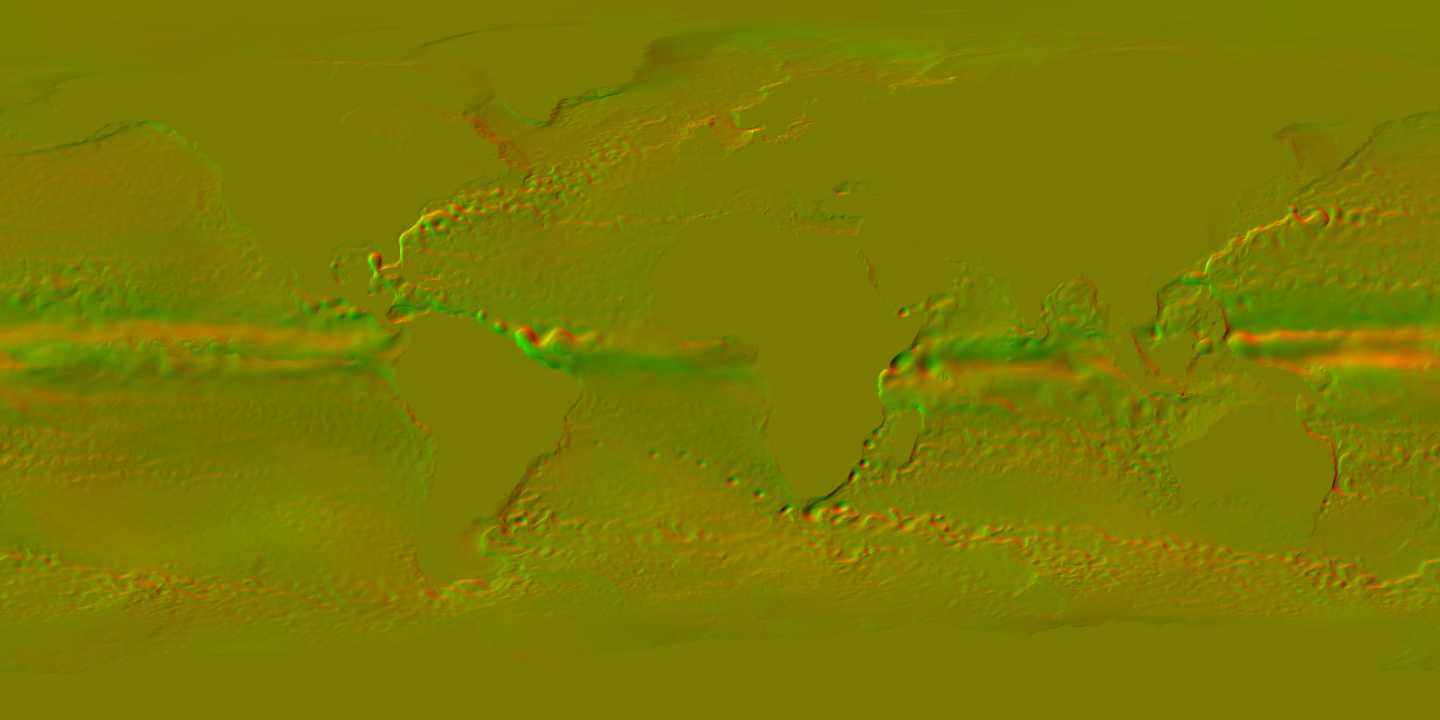

In [21]:
height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
img.save("ecco2-19920102.png")
Image.open("ecco2-19920102.png")

In [22]:
!wget ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/UVEL.nc/UVEL.1440x720x50.19920105.nc
!wget ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/VVEL.nc/VVEL.1440x720x50.19920105.nc

--2018-08-14 21:13:49--  ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/UVEL.nc/UVEL.1440x720x50.19920105.nc
           => ‘UVEL.1440x720x50.19920105.nc’
Resolving ecco.jpl.nasa.gov... 128.149.132.240
Connecting to ecco.jpl.nasa.gov|128.149.132.240|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /ECCO2/cube92_latlon_quart_90S90N/UVEL.nc ... done.
==> SIZE UVEL.1440x720x50.19920105.nc ... 207369800
==> PASV ... done.    ==> RETR UVEL.1440x720x50.19920105.nc ... done.
Length: 207369800 (198M) (unauthoritative)

UVEL.1440x720x50.19 100%[===================>] 197.76M  11.0MB/s    in 19s     

2018-08-14 21:14:09 (10.6 MB/s) - ‘UVEL.1440x720x50.19920105.nc’ saved [207369800]

--2018-08-14 21:14:09--  ftp://ecco.jpl.nasa.gov/ECCO2/cube92_latlon_quart_90S90N/VVEL.nc/VVEL.1440x720x50.19920105.nc
           => ‘VVEL.1440x720x50.19920105.nc’
Resolving ecco.jpl.nasa.gov... 128.149.132.240
Connecting to ec

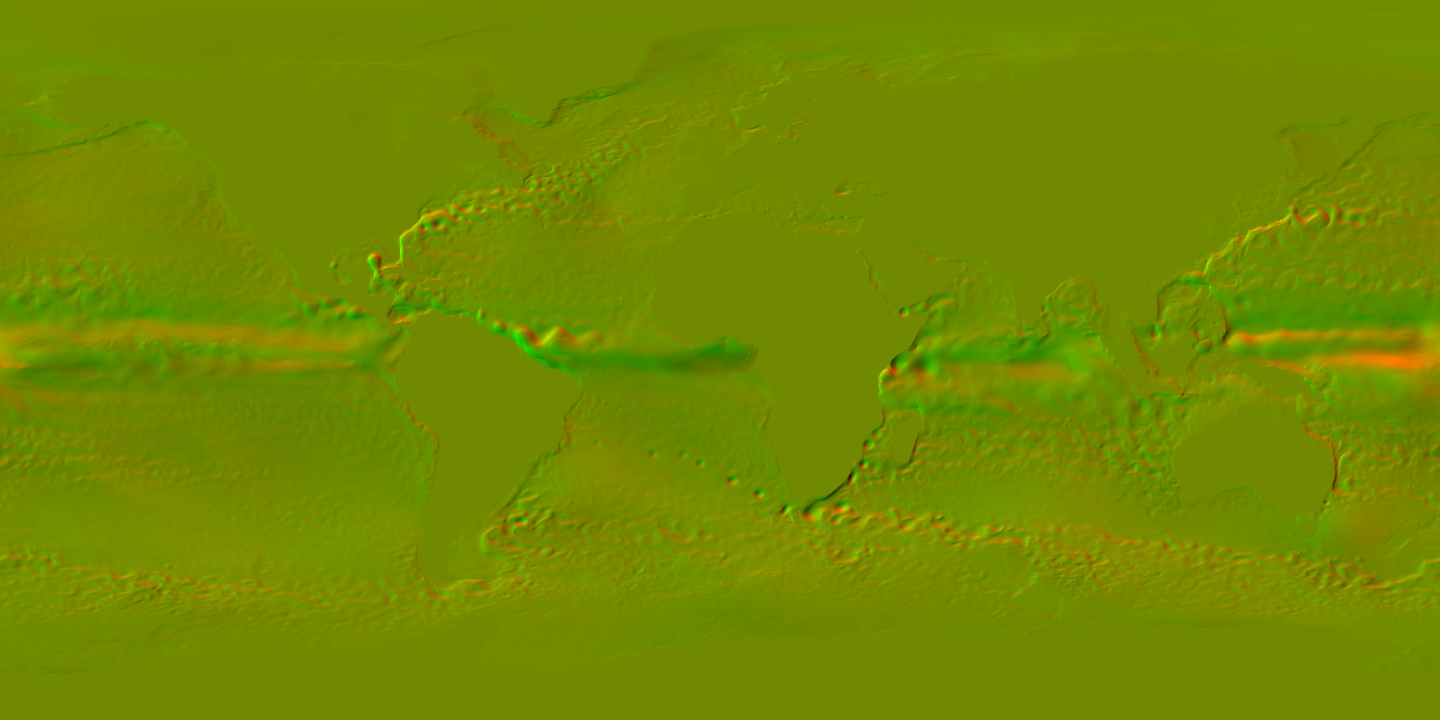

In [23]:
uvel = Dataset("UVEL.1440x720x50.19920105.nc")
vvel = Dataset("VVEL.1440x720x50.19920105.nc")
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = uvel.variables["UVEL"][0][0].flatten()
v['values'] = vvel.variables["VVEL"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()
height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
img.save("ecco2-19920105.png")
Image.open("ecco2-19920105.png")

In [26]:
uvel.variables

OrderedDict([(u'TIME', <type 'netCDF4._netCDF4.Variable'>
              float32 TIME(TIME)
                  direction: L
                  units: days since 1992-01-01 00:00:00
                  point_spacing: even
                  time_origin: 1992-01-01 00:00:00
              unlimited dimensions: 
              current shape = (1,)
              filling off), (u'DEPTH_T', <type 'netCDF4._netCDF4.Variable'>
              float32 DEPTH_T(DEPTH_T)
                  direction: K
                  units: meters
                  positive: down
                  point_spacing: uneven
              unlimited dimensions: 
              current shape = (50,)
              filling off), (u'LATITUDE_T', <type 'netCDF4._netCDF4.Variable'>
              float32 LATITUDE_T(LATITUDE_T)
                  direction: J
                  units: degrees_north
                  point_spacing: even
              unlimited dimensions: 
              current shape = (720,)
              filling off), (u'

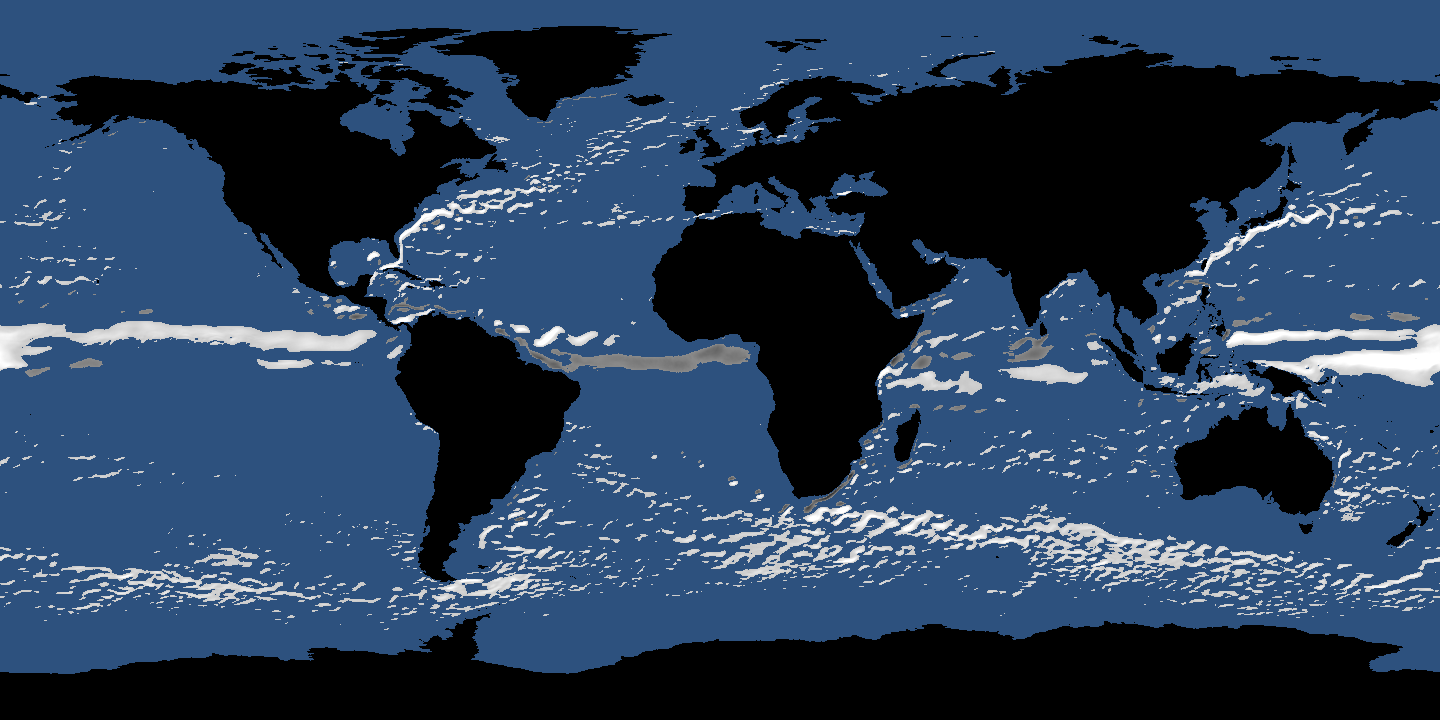

In [52]:
uvel = Dataset("UVEL.1440x720x50.19920105.nc")
vvel = Dataset("VVEL.1440x720x50.19920105.nc")
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = uvel.variables["UVEL"][0][0].flatten()
v['values'] = vvel.variables["VVEL"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()
height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        elif u["values"][k] == 0.0:
            r = 0.0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
        if ma.is_masked(v["values"][k]):
            g = 0
        elif v["values"][k] == 0.0:
            g = 0.0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))
        b = 0
            
            
        if ma.is_masked(u["values"][k]) or ma.is_masked(v["values"][k]):
            a = 0
        else:
            a = 255

        if r != 0.0 or g != 0.0:
            b = r = g = r + g * 0.5
        #if r > 109.0 and r < 114.0 or g > 135.0 and g < 140.0:
        #    r = 0.0
        #    g = 0.0
            if (r > 140.0 or g > 140.0) and (r < 200.0 or g < 200.0):
                r = 45.0
                g = 81.0
                b = 126.0
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
img.save("ecco2-19920105.png")
Image.open("ecco2-19920105.png")

In [32]:
uvel.variables["UVEL"][0][10][10][260]

0.0

In [45]:
v

{'maximum': 1.2966821,
 'minimum': -1.527464,
 'values': array([ 0.        ,  0.        ,  0.        , ..., -0.01996337,
        -0.01995984, -0.01995631], dtype=float32)}

In [37]:
g

139.0

In [53]:
foo = [0,1,2,3,4,5,6,7,8,9]

[1, 2, 3, 4, 5, 6, 7, 8]

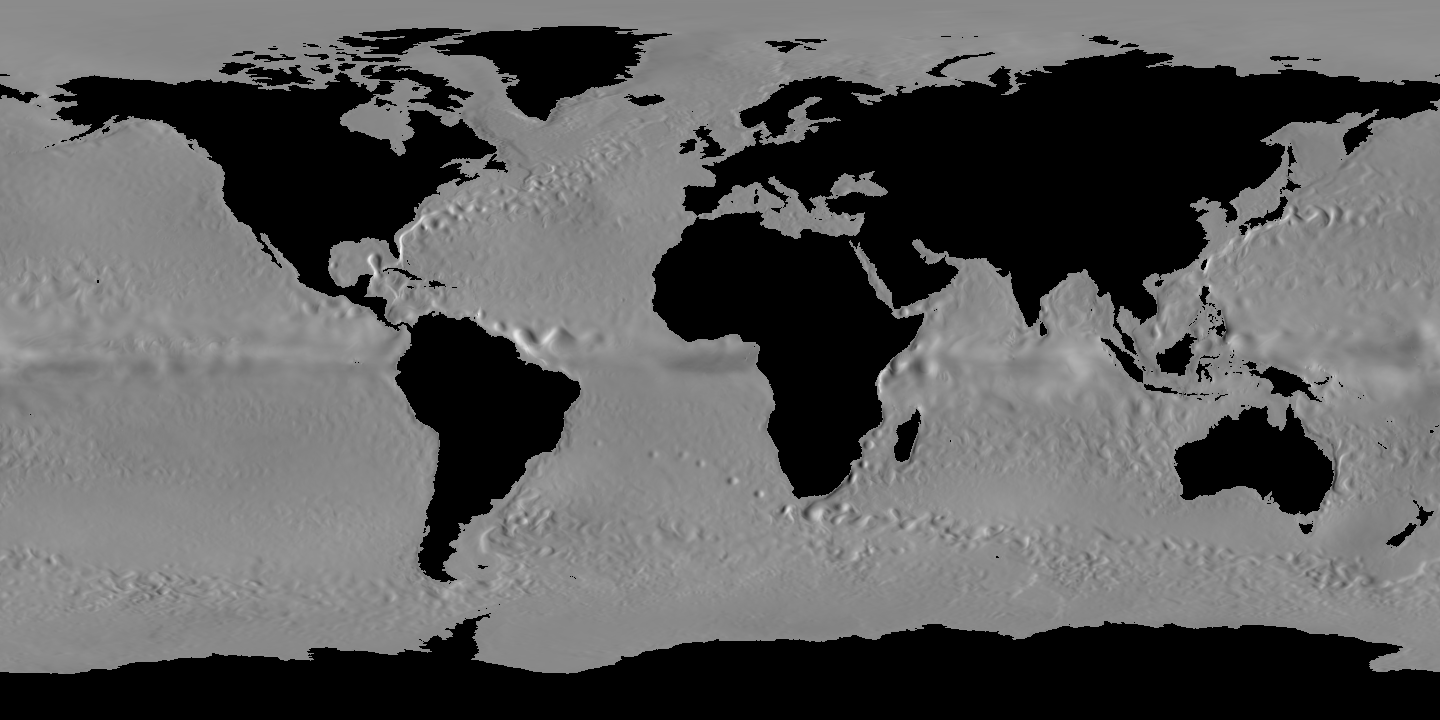

In [82]:
uvel = Dataset("UVEL.1440x720x50.19920105.nc")
vvel = Dataset("VVEL.1440x720x50.19920105.nc")
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = uvel.variables["UVEL"][0][0].flatten()
v['values'] = vvel.variables["VVEL"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()

height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if ma.is_masked(u["values"][k]):
            r = 0
        elif u["values"][k] == 0.0:
            r = 0.0
        else:
            r = math.floor(255 * (u["values"][k] - u["minimum"]) / (u["maximum"] - u["minimum"]))
            
        if ma.is_masked(v["values"][k]):
            g = 0
        elif v["values"][k] == 0.0:
            g = 0.0
        else:
            g = math.floor(255 * (v["values"][k] - v["minimum"]) / (v["maximum"] - v["minimum"]))

        b = 0
 
        b  = r =g
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
img.save("ecco2-19920105.png")
Image.open("ecco2-19920105.png")

In [62]:
data[0,10]

(115, 141, 0)

In [63]:
u

{'maximum': 1.2755319,
 'minimum': -1.0311892,
 'values': array([ 0.        ,  0.        ,  0.        , ..., -0.00384665,
        -0.00395246, -0.00405826], dtype=float32)}

In [68]:
(u['minimum'] - u['minimum'])/(u['maximum'] - u['minimum'])

0.0

In [69]:
np.dot(u["values"], v["values"])

525.91962

In [72]:
math.abs(u["values"] * v["values"])

AttributeError: 'module' object has no attribute 'abs'

In [89]:
np.sqrt(u["values"] * u["values"])

array([ 0.        ,  0.        ,  0.        , ...,  0.00384665,
        0.00395246,  0.00405826], dtype=float32)

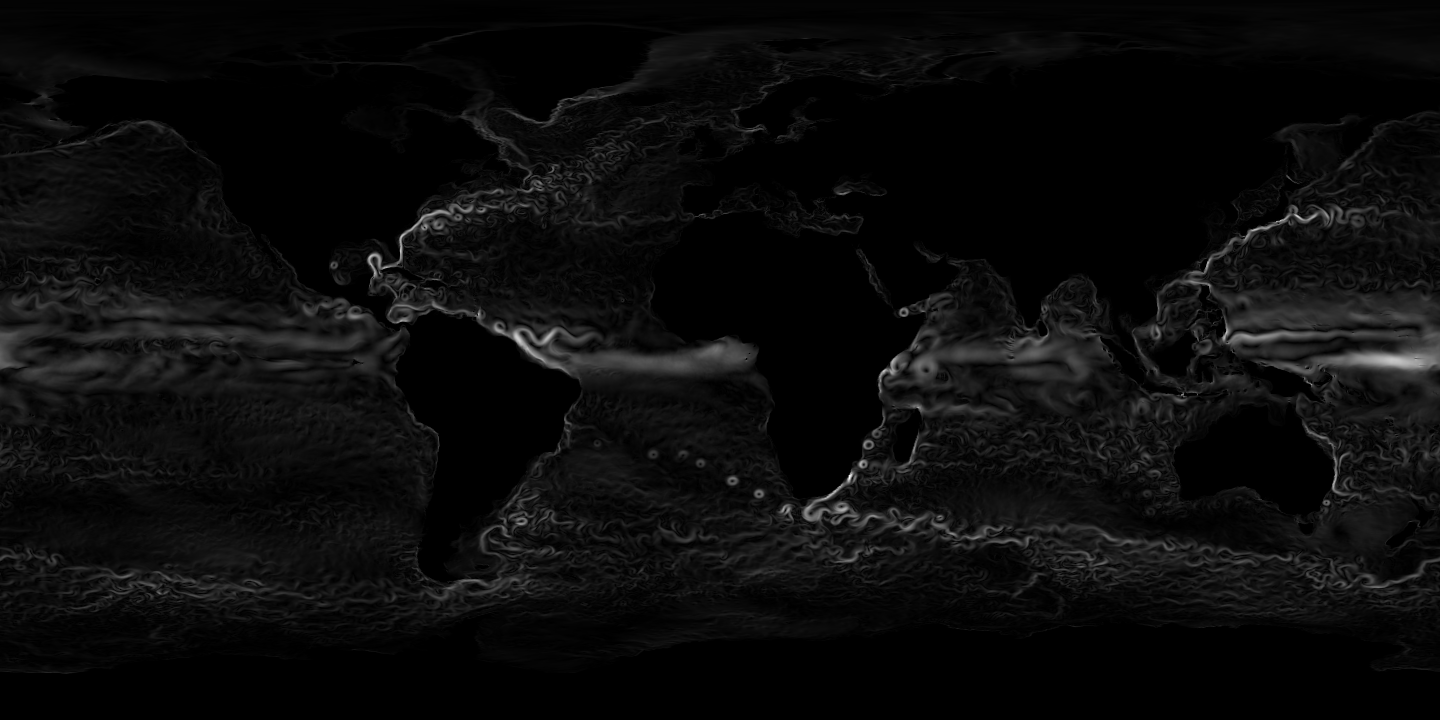

In [90]:
uvel = Dataset("UVEL.1440x720x50.19920105.nc")
vvel = Dataset("VVEL.1440x720x50.19920105.nc")
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = uvel.variables["UVEL"][0][0].flatten()
v['values'] = vvel.variables["VVEL"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()
z = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
z["values"] = np.sqrt(u["values"] * u["values"] + v["values"] * v["values"])
z['minimum'] = z['values'].min()
z['maximum'] = z['values'].max()
height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if u["values"][k] == 0.0:
            r = 0.0
            g = 0.0
            b = 0.0
        elif v["values"][k] == 0.0:
            r = 0.0
            g = 0.0
            b = 0.0
        else:
            r = g = b = math.floor(255 * (z["values"][k] - z["minimum"]) / (z["maximum"] - z["minimum"]))
        a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
img.save("ecco2-19920105.png")
Image.open("ecco2-19920105.png")

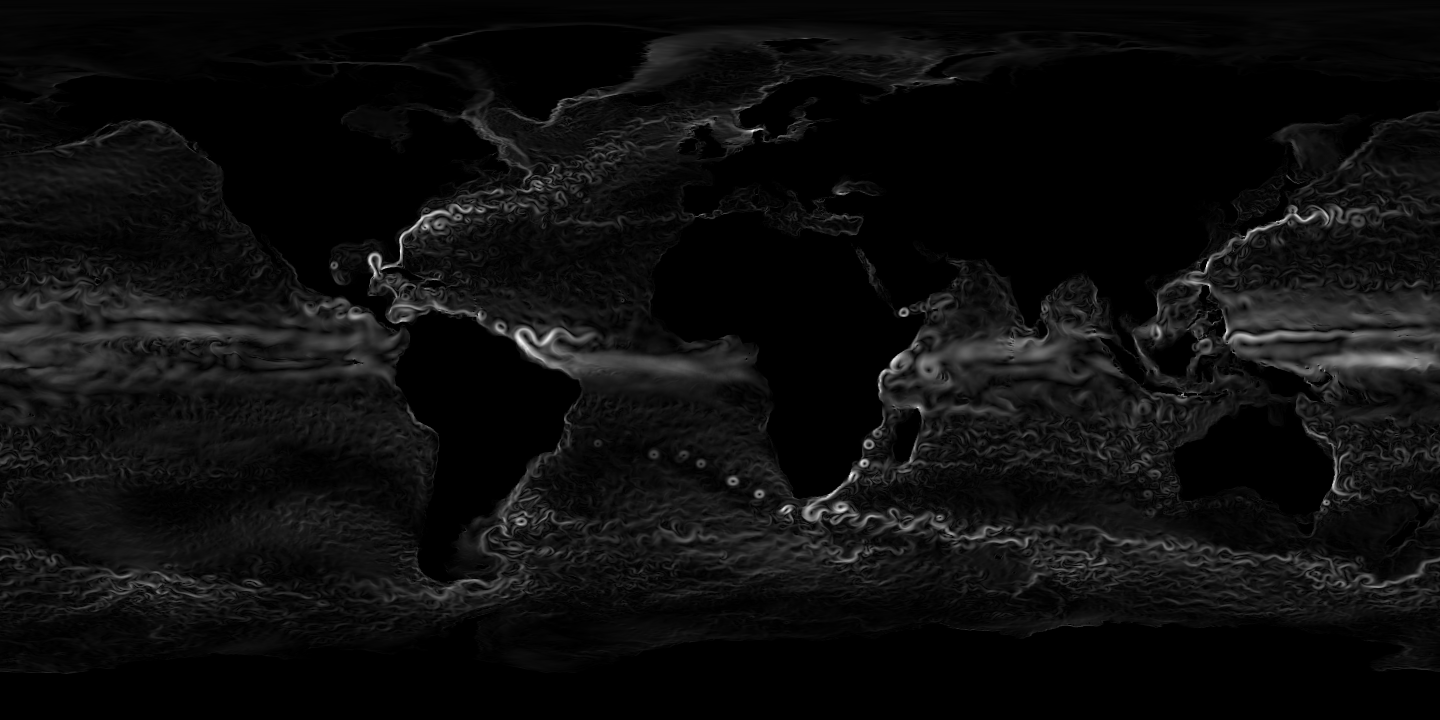

In [91]:
uvel = Dataset("UVEL.1440x720x50.19920102.nc")
vvel = Dataset("VVEL.1440x720x50.19920102.nc")
u = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
v = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
u['values'] = uvel.variables["UVEL"][0][0].flatten()
v['values'] = vvel.variables["VVEL"][0][0].flatten()
u['minimum'] = u['values'].min()
u['maximum'] = u['values'].max()
v['minimum'] = v['values'].min()
v['maximum'] = v['values'].max()
z = {'values': [], 'minimum': 0.0, 'maximum': 0.0}
z["values"] = np.sqrt(u["values"] * u["values"] + v["values"] * v["values"])
z['minimum'] = z['values'].min()
z['maximum'] = z['values'].max()
height = 720
width = 1440
img = Image.new('RGB', (1440,720))
data = img.load()
for y in range(height):
    for x in range(width):
        i = (y * width + x) * 4;
        k = y * width + (x + width / 2) % width;
        if u["values"][k] == 0.0:
            r = 0.0
            g = 0.0
            b = 0.0
        elif v["values"][k] == 0.0:
            r = 0.0
            g = 0.0
            b = 0.0
        else:
            r = g = b = math.floor(255 * (z["values"][k] - z["minimum"]) / (z["maximum"] - z["minimum"]))
        a = 255
        data[x,height - 1 - y] = (int(r),int(g),int(b), int(a)) 
img.save("ecco2-19920102.png")
Image.open("ecco2-19920102.png")